In [70]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')

%pylab inline
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Загрузим данные и посмотрим на них:

In [71]:
data = pd.read_csv("tmdb-5000-movie-dataset/tmdb_5000_movies.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [72]:
data = data.dropna(how='all')
data.shape

(4803, 20)

In [73]:
data[:1]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


Для удобства оставим только нужные признаки:

In [74]:
useful_cols = ['title', 'budget', 'revenue', 'genres', 'original_language', 'release_date', 'runtime', 'vote_average']
data = data[useful_cols]

In [75]:
data.head(3)

,title,budget,revenue,genres,original_language,release_date,runtime,vote_average
0,Avatar,237000000,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,2009-12-10,162.0,7.2
1,Pirates of the Caribbean: At World's End,300000000,961000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,2007-05-19,169.0,6.9
2,Spectre,245000000,880674609,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,2015-10-26,148.0,6.3


Количество выпущенных фильмов по годам:

In [76]:
from datetime import datetime
from collections import Counter, OrderedDict
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'] = data['release_date'].dt.year

In [77]:
data.head(3)

,title,budget,revenue,genres,original_language,release_date,runtime,vote_average
0,Avatar,237000000,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,2009.0,162.0,7.2
1,Pirates of the Caribbean: At World's End,300000000,961000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,2007.0,169.0,6.9
2,Spectre,245000000,880674609,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,2015.0,148.0,6.3


In [78]:
movies_year_df = data.groupby(['release_date'])['title'].count()

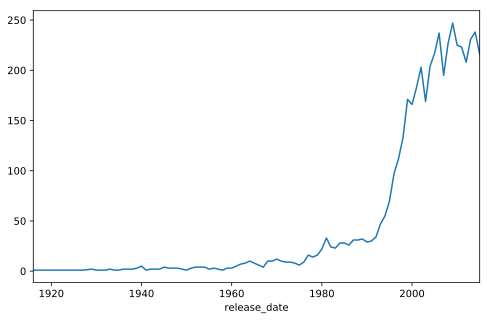

In [79]:
movies_year_df[movies_year_df.index < 2016].plot()

Распределение оценок фильмов:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15511e48>]], dtype=object)

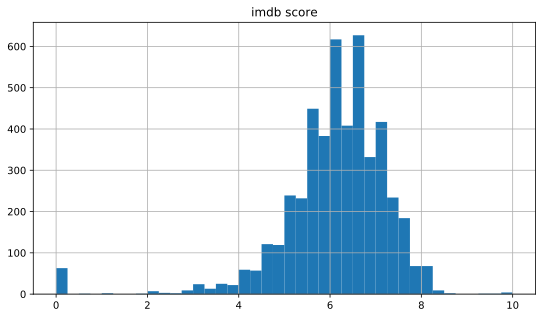

In [80]:
mpl.rcParams['figure.figsize'] = (9, 5)
scores = pd.DataFrame({"imdb score":data["vote_average"]})
scores.hist(bins=40)

10 самых кассовых фильмов:

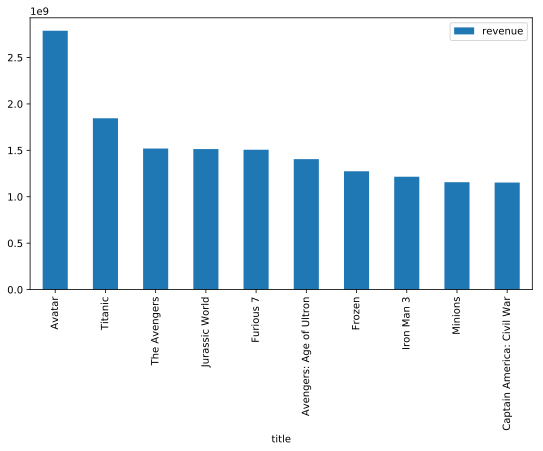

In [81]:
revenue_df = data.groupby('title')['revenue'].sum()
revenue_df = pd.DataFrame(revenue_df)
revenue_df = revenue_df.sort_values(by = ['revenue'], ascending = False)
revenue_plot = revenue_df[:10].plot(kind = 'bar')

Посмотрим на зависимость чистой прибыли фильма и оценок:

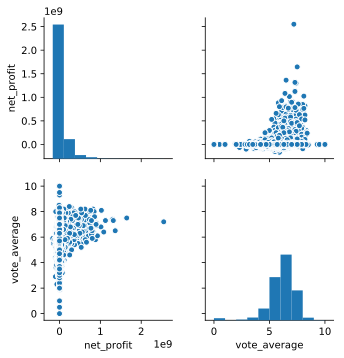

In [82]:
data['net_profit'] = data['revenue'] - data['budget'] 
budget_vs_vote_df = data[['net_profit', 'vote_average']].sort_index(ascending=True)
sns.pairplot(budget_vs_vote_df)

Вытащим названия жанров и посмотрим сколько фильмов в данном жанре выпускалось в разные годы:

In [83]:
import json
def genres_parse(i):
    j = json.loads(i['genres'])
    for k in j:
        i[k['name']] = 1
    return i

In [84]:
genres_df = data[['release_date', 'genres']].apply(func=genres_parse, axis=1).fillna(0).groupby('release_date').sum()
genres_df.head(5)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_date,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1916.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1927.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1929.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0


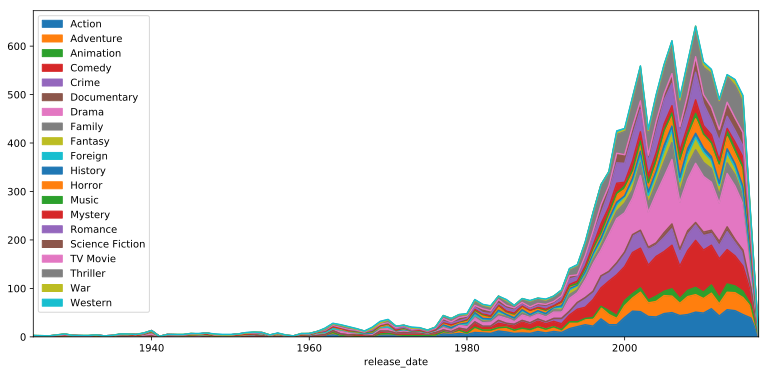

In [85]:
mpl.rcParams['figure.figsize'] = 13,6
genres_df[genres_df.index > 1920].plot(kind='area')